In [62]:
import pickle
with open("/work/dlclarge2/sukthank-hw-llm-bench/HW-Aware-LLM-Bench/latency_v100/efficiency_observations.pkl","rb") as f:
    a = pickle.load(f)
    

In [37]:
import pickle
i = 0
increment = 2500
cat_list = []
for i in range(0, 10000, increment):
 path = "/work/dlclarge2/sukthank-hw-llm-bench/HW-Aware-LLM-Bench/latency_v100/efficiency_observations_" + str(i) + "_" + str(i+increment) + ".pkl"
 with open(path,"rb") as f:
    a = pickle.load(f)
    cat_list.extend(a)
a = cat_list

In [1]:
import pickle
i = 0
increment = 2500
cat_list = []
for i in range(0, 10000, increment):
 path = "/work/dlclarge2/sukthank-hw-llm-bench/HW-Aware-LLM-Bench/arch_ppl_bench_s/ppl_observations_tracker_" + str(i) + "_" + str(i+increment) + ".pkl"
 with open(path,"rb") as f:
    a = pickle.load(f)
    cat_list.extend(a)
a = cat_list

In [3]:
a[0]

{'accuracy': 0.340507447719574,
 'perplexity': 48.99000930786133,
 'arch': {'sample_embed_dim': 192,
  'sample_n_layer': 11,
  'sample_layer_indices': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
  'sample_n_head': [4, 4, 4, 8, 4, 8, 8, 8, 8, 4, 4, 12],
  'sample_mlp_ratio': [4, 3, 2, 2, 3, 4, 4, 4, 3, 2, 3, 4],
  'sample_bias': True}}

In [4]:
import pickle
i = 0
increment = 2500
cat_list = []
for i in range(0, 10000, increment):
 path = "/work/dlclarge2/sukthank-hw-llm-bench/HW-Aware-LLM-Bench/latency_v100/efficiency_observations_" + str(i) + "_" + str(i+increment) + ".pkl"
 with open(path,"rb") as f:
    a2 = pickle.load(f)
    cat_list.extend(a2)
a2 = cat_list

In [16]:
all_stats = {}
all_stats["params"] = []
all_stats["latency"] = []
all_stats["flops"] = []
all_stats["ppl"] = []
all_stats["accuracy"] = []
for arch in a:
  all_stats["ppl"].append(-arch["perplexity"])
  all_stats["accuracy"].append(arch["accuracy"])
  for arch2 in a2:
    if arch["arch"] == arch2["arch"]:
      all_stats["params"].append(arch2["params"])
      print(arch2)
      all_stats["latency"].append(arch2["gpu_lat"])
      all_stats["flops"].append(arch2["flops"])
      break


{'arch': {'sample_embed_dim': 192, 'sample_n_layer': 11, 'sample_layer_indices': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10], 'sample_n_head': [4, 4, 4, 8, 4, 8, 8, 8, 8, 4, 4, 12], 'sample_mlp_ratio': [4, 3, 2, 2, 3, 4, 4, 4, 3, 2, 3, 4], 'sample_bias': True}, 'cpu_lat': None, 'cpu_lat_std': None, 'gpu_lat': 17.8775, 'gpu_lat_std': 0.08115694671437657, 'unit_cpu': [], 'unit_gpu': ['ms', 'ms', 'ms', 'ms', 'ms', 'ms', 'ms', 'ms', 'ms', 'ms'], 'times_profiler_gpu': [17.885, 17.746, 17.963, 17.899, 18.001, 17.943, 17.825, 17.896, 17.743, 17.874], 'times_profiler_cpu': [], 'flops': 271465316352, 'macs': 135615479808, 'params': 26241792, 'mean_co2_cpu': None, 'std_co2_cpu': None, 'std_co2_gpu': 0.0, 'mean_co2_gpu': 0.0, 'unit': 'kgCO2', 'mean_energy_cpu': None, 'std_energy_cpu': None, 'mean_energy_gpu': 0.0019753697144685267, 'std_energy_gpu': 0.00032501313986789616, 'unit_energy': 'Wh'}
{'arch': {'sample_embed_dim': 384, 'sample_n_layer': 10, 'sample_layer_indices': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9], 

In [17]:
# metric correlation
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import scipy.stats as stats
corr_mat = np.zeros((5,5))
for i in range(5):
  for j in range(5):
    corr_mat[i,j] = stats.kendalltau(all_stats[list(all_stats.keys())[i]], all_stats[list(all_stats.keys())[j]])[0]



<Axes: >

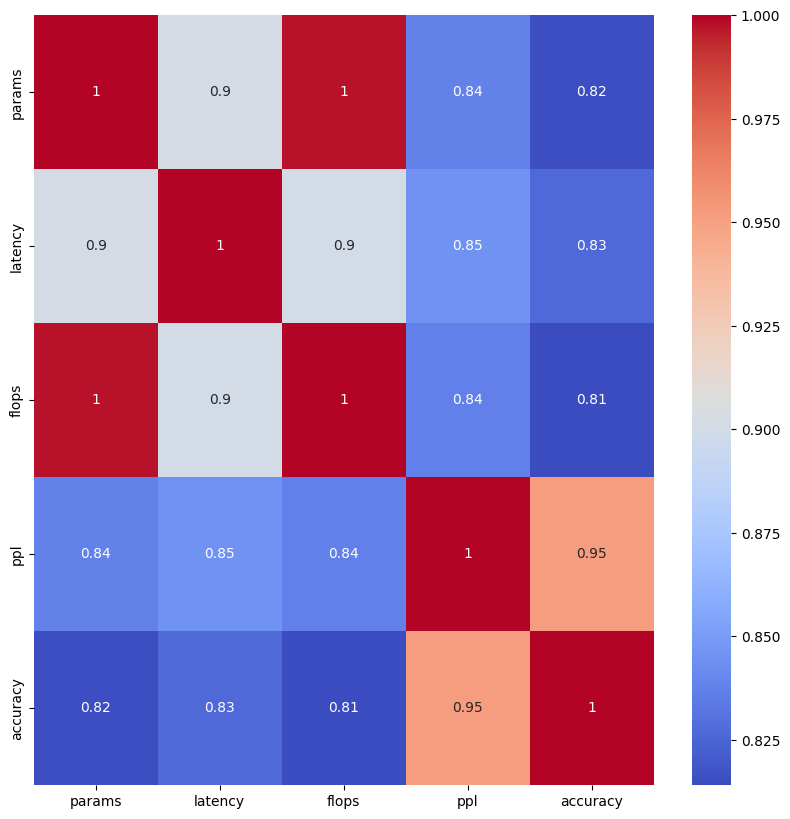

In [18]:
# plot corr mat beautifully
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
sns.heatmap(corr_mat, annot=True, cmap="coolwarm", xticklabels=list(all_stats.keys()), yticklabels=list(all_stats.keys()))

In [38]:
embedding_dim_768 = []
embedding_dim_384 = []
embedding_dim_192 = []
for i in a:
    if i["arch"]["sample_embed_dim"] == 768:
        embedding_dim_768.append(i["mean_energy_gpu"])
    if i["arch"]["sample_embed_dim"] == 384:
        embedding_dim_384.append(i["mean_energy_gpu"])
    if i["arch"]["sample_embed_dim"] == 192:
        embedding_dim_192.append(i["mean_energy_gpu"])

In [43]:
layers_12 = []
layers_10 = []
layers_11 = []
for i in a:
    if i["arch"]["sample_n_layer"] == 12:
        layers_12.append(i["mean_energy_gpu"])
    if i["arch"]["sample_n_layer"] == 10:
        layers_10.append(i["mean_energy_gpu"])
    if i["arch"]["sample_n_layer"] == 11:
        layers_11.append(i["mean_energy_gpu"])


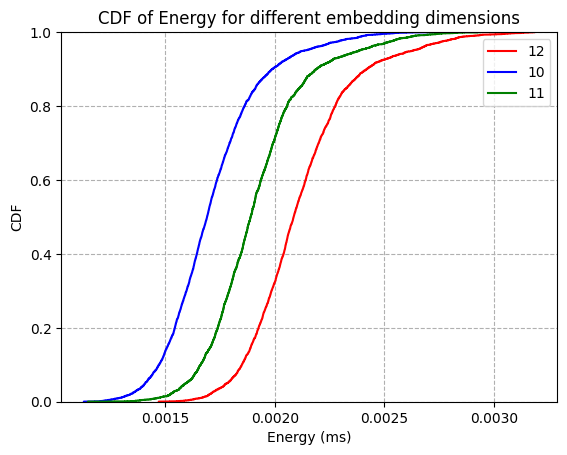

In [44]:
# ecdf 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.grid(linestyle='--')
plt.ecdf(layers_12, label="12",color='r')
plt.ecdf(layers_10, label="10",color='b')
plt.ecdf(layers_11, label="11",color='g')

plt.legend()
plt.xlabel("Energy (ms)")
plt.ylabel("CDF")
plt.title("CDF of Energy for different embedding dimensions")
plt.savefig("energy_cdf_v100_layers.pdf")

In [49]:
num_heads_avg_4_to_8 = []
num_heads_avg_8_to_12 = []
for i in a:
    if np.mean(i["arch"]["sample_n_head"]) >= 4 and np.mean(i["arch"]["sample_n_head"]) <= 8:
        num_heads_avg_4_to_8.append(i["mean_energy_gpu"])
    if np.mean(i["arch"]["sample_n_head"]) > 8 and np.mean(i["arch"]["sample_n_head"]) <= 12:
        num_heads_avg_8_to_12.append(i["mean_energy_gpu"])

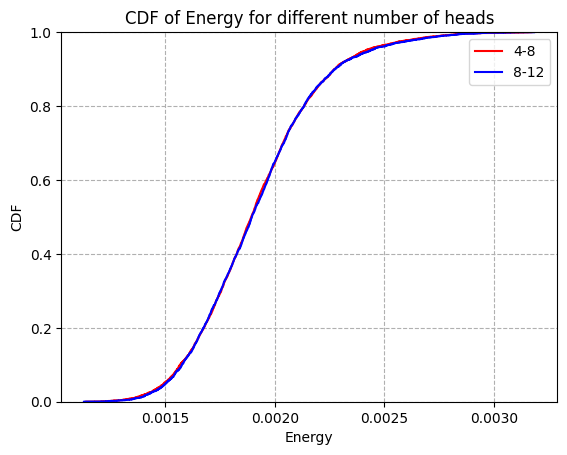

In [50]:
# ecdf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.grid(linestyle='--')
plt.ecdf(num_heads_avg_4_to_8, label="4-8",color='r')
plt.ecdf(num_heads_avg_8_to_12, label="8-12",color='b')

plt.legend()
plt.xlabel("Energy")
plt.ylabel("CDF")
plt.title("CDF of Energy for different number of heads")
plt.savefig("energy_cdf_v100_num_heads.pdf")



In [51]:
mlp_ratio_2_to_3 = []
mlp_ratio_3_to_4 = []
for i in a:
    if np.mean(i["arch"]["sample_mlp_ratio"]) >= 2 and np.mean(i["arch"]["sample_mlp_ratio"]) <= 3:
        mlp_ratio_2_to_3.append(i["mean_energy_gpu"])
    if np.mean(i["arch"]["sample_mlp_ratio"]) > 3 and np.mean(i["arch"]["sample_mlp_ratio"]) <= 4:
        mlp_ratio_3_to_4.append(i["mean_energy_gpu"])

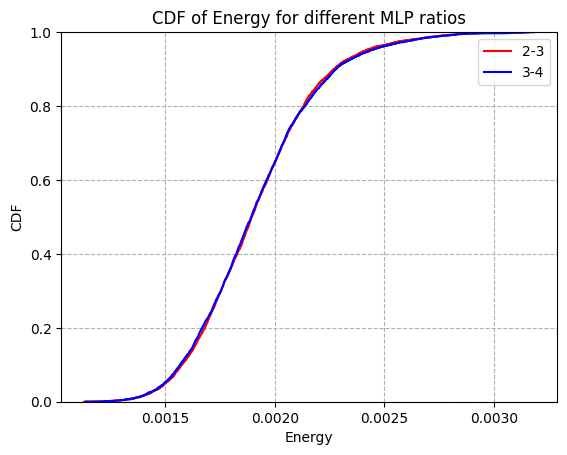

In [52]:
# ecdf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.grid(linestyle='--')
plt.ecdf(mlp_ratio_2_to_3, label="2-3",color='r')
plt.ecdf(mlp_ratio_3_to_4, label="3-4",color='b')
plt.legend()
plt.xlabel("Energy")
plt.ylabel("CDF")
plt.title("CDF of Energy for different MLP ratios")
plt.savefig("energy_cdf_v100_mlp_ratio.pdf")

In [40]:
# print quantiles for each embedding dimension
print("Embedding Dimension 768")
print("25th percentile: ", np.percentile(embedding_dim_768, 25))
print("50th percentile: ", np.percentile(embedding_dim_768, 50))
print("75th percentile: ", np.percentile(embedding_dim_768, 75))
print("Embedding Dimension 384")
print("25th percentile: ", np.percentile(embedding_dim_384, 25))
print("50th percentile: ", np.percentile(embedding_dim_384, 50))
print("75th percentile: ", np.percentile(embedding_dim_384, 75))
print("Embedding Dimension 192")
print("25th percentile: ", np.percentile(embedding_dim_192, 25))
print("50th percentile: ", np.percentile(embedding_dim_192, 50))
print("75th percentile: ", np.percentile(embedding_dim_192, 75))

Embedding Dimension 768
25th percentile:  0.0017856928015715652
50th percentile:  0.001975096609979558
75th percentile:  0.002181780965609841
Embedding Dimension 384
25th percentile:  0.001711772891547587
50th percentile:  0.001890300488480548
75th percentile:  0.002068020814847537
Embedding Dimension 192
25th percentile:  0.0016673706695530203
50th percentile:  0.0018290539565736542
75th percentile:  0.001996155463648204


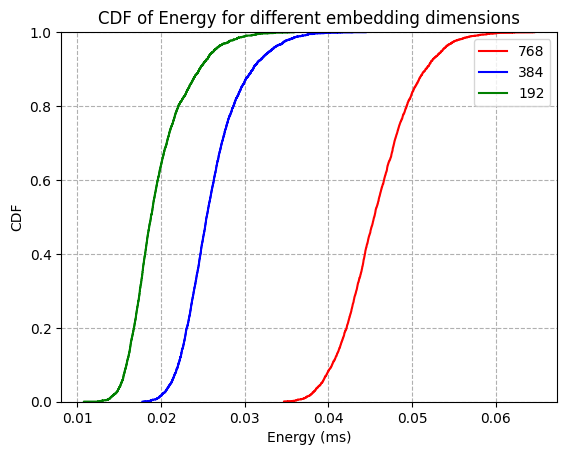

In [36]:
# plot ecdf of latency
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# add dotted grid
plt.grid(linestyle='--')
plt.ecdf(embedding_dim_768, label="768",color='r')
plt.ecdf(embedding_dim_384, label="384",color='b')
plt.ecdf(embedding_dim_192, label="192",color='g')

plt.legend()
plt.xlabel("Energy (ms)")
plt.ylabel("CDF")
plt.title("CDF of Energy for different embedding dimensions")
plt.savefig("energy_cdf_meta_cpu.pdf")

In [3]:
a

[{'arch': {'sample_embed_dim': 768,
   'sample_n_layer': 10,
   'sample_layer_indices': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
   'sample_n_head': [4, 12, 12, 4, 4, 12, 12, 8, 4, 12, 8, 4],
   'sample_mlp_ratio': [2, 2, 4, 4, 3, 3, 3, 4, 4, 2, 3, 2],
   'sample_bias': False},
  'cpu_lat': None,
  'cpu_lat_std': None,
  'gpu_lat': 46.7432,
  'gpu_lat_std': 0.05875848874843618,
  'unit_cpu': [],
  'unit_gpu': ['ms', 'ms', 'ms', 'ms', 'ms', 'ms', 'ms', 'ms', 'ms', 'ms'],
  'times_profiler_gpu': [46.892,
   46.733,
   46.742,
   46.709,
   46.662,
   46.717,
   46.78,
   46.701,
   46.766,
   46.73],
  'times_profiler_cpu': [],
  'flops': 1802502144000,
  'macs': 900823252992,
  'params': 148591104,
  'mean_co2_cpu': None,
  'std_co2_cpu': None,
  'std_co2_gpu': 0.0,
  'mean_co2_gpu': 0.0,
  'unit': 'kgCO2',
  'mean_energy_cpu': None,
  'std_energy_cpu': None,
  'mean_energy_gpu': 0.001559030002844467,
  'std_energy_gpu': 0.0003517538858733884,
  'unit_energy': 'Wh'},
 {'arch': {'sample_embed_dim

In [154]:
a = cat_list
print(a[0])
print(len(a))

{'arch': {'sample_embed_dim': 1024, 'sample_n_layer': 24, 'sample_layer_indices': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23], 'sample_n_head': [8, 8, 12, 8, 16, 12, 16, 12, 16, 8, 8, 16, 16, 16, 12, 8, 12, 8, 12, 16, 12, 12, 12, 8], 'sample_mlp_ratio': [4, 2, 4, 3, 3, 2, 4, 4, 2, 4, 3, 3, 3, 4, 2, 2, 3, 2, 4, 3, 3, 2, 3, 4], 'sample_bias': False}, 'cpu_lat': None, 'cpu_lat_std': None, 'gpu_lat': 40.919799999999995, 'gpu_lat_std': 0.018935680605671936, 'unit_cpu': [], 'unit_gpu': ['ms', 'ms', 'ms', 'ms', 'ms', 'ms', 'ms', 'ms', 'ms', 'ms'], 'times_profiler_gpu': [40.962, 40.936, 40.933, 40.922, 40.913, 40.917, 40.901, 40.918, 40.899, 40.897], 'times_profiler_cpu': [], 'flops': 2913975926784, 'macs': 1456321069056, 'params': 407107584, 'mean_co2_cpu': None, 'std_co2_cpu': None, 'std_co2_gpu': 0.0, 'mean_co2_gpu': 0.0, 'unit': 'kgCO2', 'mean_energy_cpu': None, 'std_energy_cpu': None, 'mean_energy_gpu': 0.006632581233925727, 'std_energy_gpu': 0.0

In [181]:
import pickle
i = 0
increment = 2500
cat_list = []
for i in range(0, 10000, increment):
 path = "/work/dlclarge2/sukthank-hw-llm-bench/HW-Aware-LLM-Bench/latency_v100_m/efficiency_observations_" + str(i) + "_" + str(i+increment) + ".pkl"
 with open(path,"rb") as f:
    a2 = pickle.load(f)
    cat_list.extend(a2)
a2 = cat_list


In [175]:
print(len(a2))
print(len(a))

10000
10000


In [182]:
import numpy as np
energy = []
flops = []
lat = []
params = []
units = []
arch = []
colors_embed = []
colors_layers = []
colors_heads = []
colors_mlp_ratio = []

for i in range(len(a)):
    energy.append(a[i]["mean_energy_gpu"])
    flag = False
    for k in a2:
        if k["arch"] == a[i]["arch"]:
            flops.append(k["flops"])
            flag = True
            break
    if not flag:
        flops.append(a[i]["flops"])
    #lat.append(a[i]["cpu_lat"])
    if a[i]["arch"]["sample_embed_dim"] == 768:
        colors_embed.append("blue")
    elif a[i]["arch"]["sample_embed_dim"] == 384:
        colors_embed.append("red")
    else:
        colors_embed.append("green")
    if a[i]["arch"]["sample_n_layer"] <=12 and a[i]["arch"]["sample_n_layer"] >= 8:
        colors_layers.append("blue")
    elif a[i]["arch"]["sample_n_layer"] <= 8 and a[i]["arch"]["sample_n_layer"] >= 4:
        colors_layers.append("red")
    else:
        colors_layers.append("green")
    if np.mean(a[i]["arch"]["sample_n_head"]) <= 12 and np.mean(a[i]["arch"]["sample_n_head"]) >= 8:
        colors_heads.append("blue")
    elif np.mean(a[i]["arch"]["sample_n_head"]) <= 8 and np.mean(a[i]["arch"]["sample_n_head"]) >= 4:
        colors_heads.append("red")
    elif np.mean(a[i]["arch"]["sample_n_head"]) <= 4 and np.mean(a[i]["arch"]["sample_n_head"]) >= 2:
        colors_heads.append("green")
    else:
        colors_heads.append("black")
    if np.mean(a[i]["arch"]["sample_mlp_ratio"]) <= 4 and np.mean(a[i]["arch"]["sample_mlp_ratio"]) >= 3:
        colors_mlp_ratio.append("blue")
    elif np.mean(a[i]["arch"]["sample_mlp_ratio"]) <= 3 and np.mean(a[i]["arch"]["sample_mlp_ratio"]) >= 2:
        colors_mlp_ratio.append("red")
    elif a[i]["arch"]["sample_mlp_ratio"] == 2:
        colors_mlp_ratio.append("green")

    
    
    arch.append(a[i]["arch"])
    lats_all = []
    for j, unit in enumerate(a[i]["unit_gpu"]):
        if unit == "ms":
            lats_all.append(a[i]["times_profiler_gpu"][j])
        else:
            lats_all.append(a[i]["times_profiler_gpu"][j]*1000)
    lat.append(np.mean(lats_all))

    #if a[i]["unit_cpu"]=="s" and a[i]["cpu_lat"] > 100:
    #    print(a[i]["gpu_lat"])
    units.extend(a[i]["unit_gpu"])
    params.append(a[i]["params"])


In [177]:
print(len(flops))

10000


/tmp/ipykernel_1243690/2918288197.py:2: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(lat, flops, c=colors_layers, s=50, cmap='viridis')


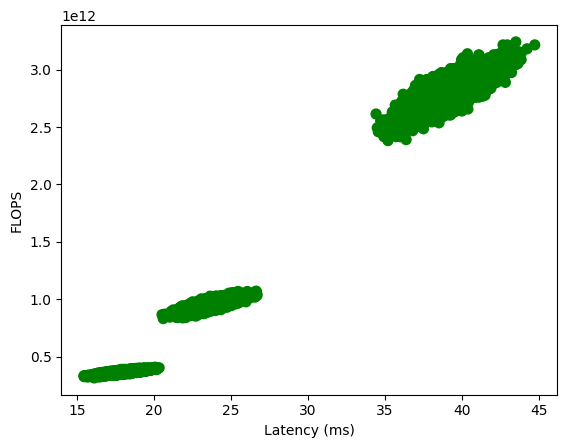

/tmp/ipykernel_1243690/2918288197.py:9: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(lat, flops, c=colors_embed, s=50, cmap='viridis')


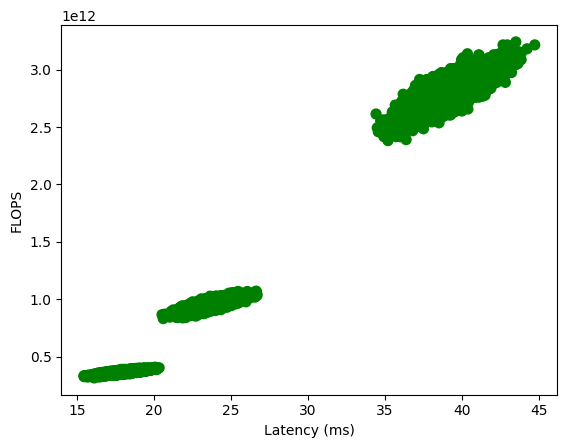

/tmp/ipykernel_1243690/2918288197.py:15: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(lat, flops, c=colors_heads, s=50, cmap='viridis')


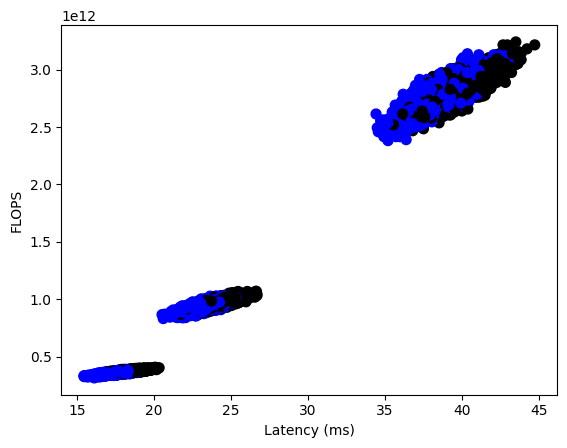

/tmp/ipykernel_1243690/2918288197.py:21: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(lat, flops, c=colors_mlp_ratio, s=50, cmap='viridis')


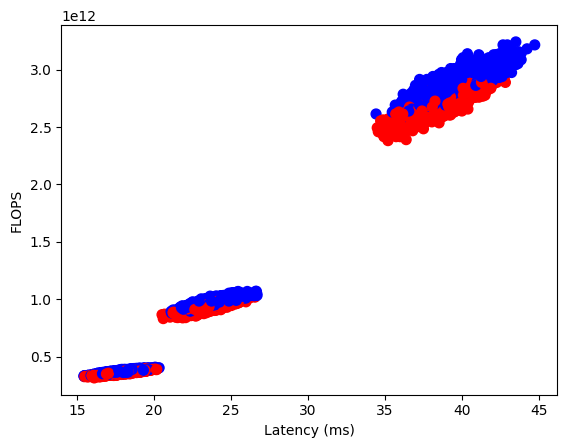

In [158]:

import matplotlib.pyplot as plt
plt.scatter(lat, flops, c=colors_layers, s=50, cmap='viridis')
plt.xlabel("Latency (ms)")
plt.ylabel("FLOPS")
plt.savefig("lat_flops_layers.pdf")

plt.show()
plt.clf()
plt.scatter(lat, flops, c=colors_embed, s=50, cmap='viridis')
plt.xlabel("Latency (ms)")
plt.ylabel("FLOPS")
plt.savefig("lat_flops_embed.pdf")
plt.show()
plt.clf()
plt.scatter(lat, flops, c=colors_heads, s=50, cmap='viridis')
plt.xlabel("Latency (ms)")
plt.ylabel("FLOPS")
plt.savefig("lat_flops_heads.pdf")
plt.show()
plt.clf()
plt.scatter(lat, flops, c=colors_mlp_ratio, s=50, cmap='viridis')
plt.xlabel("Latency (ms)")
plt.ylabel("FLOPS")
plt.savefig("lat_flops_mlp_ratio.pdf")



    


In [98]:
print(arch[2])
print(colors_embed[2])
print(a[0])

{'sample_embed_dim': 192, 'sample_n_layer': 7, 'sample_layer_indices': [0, 1, 2, 3, 4, 5, 6], 'sample_n_head': [12, 8, 4, 8, 4, 8, 12, 12, 8, 12, 12, 4], 'sample_mlp_ratio': [4, 4, 3, 3, 3, 4, 2, 2, 3, 2, 4, 4], 'sample_bias': 'True False'}
green
{'arch': {'sample_embed_dim': 384, 'sample_n_layer': 2, 'sample_layer_indices': [0, 1], 'sample_n_head': [12, 8, 8, 2, 2, 2, 4, 2, 8, 12, 12, 12], 'sample_mlp_ratio': [2, 4, 3, 2, 2, 2, 2, 3, 3, 3, 3, 3], 'sample_bias': 'True False'}, 'cpu_lat': 1.6670000000000003, 'cpu_lat_std': 1.6670000000000003, 'gpu_lat': None, 'gpu_lat_std': None, 'unit_cpu': 's', 'unit_gpu': None, 'flops': 391967145984, 'macs': 195934814208, 'params': 43229184, 'mean_co2_cpu': 0.0, 'std_co2_cpu': 0.0, 'std_co2_gpu': None, 'mean_co2_gpu': None, 'unit': 'kgCO2', 'mean_energy_cpu': 0.02935595685442685, 'std_energy_cpu': 0.0003161264979240218, 'mean_energy_gpu': None, 'std_energy_gpu': None, 'unit_energy': 'Wh'}


In [151]:
plt.clf()
for i in range(3):
    plt.scatter(X[cluster_ids[i], 0], X[cluster_ids[i], 1], s=50, cmap='viridis')

NameError: name 'X' is not defined

<Figure size 640x480 with 0 Axes>

In [17]:
!pip install seaborn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 6.9 MB/s eta 0:00:00a 0:00:01


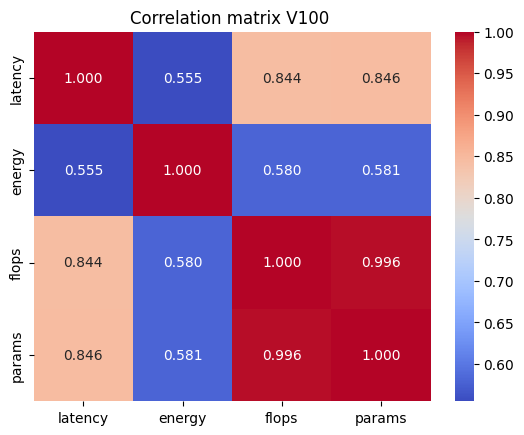

In [183]:
# compute kendall tau across all metrics
import scipy.stats
matrix = np.zeros([4,4])
for i,li in enumerate([lat, energy, flops, params]):
    for j, lj in enumerate([lat, energy, flops, params]):
        matrix[i,j] = scipy.stats.kendalltau(li, lj)[0]
# plot the correlation matrix
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(matrix, annot=True, xticklabels=["latency", "energy", "flops", "params"], yticklabels=["latency", "energy", "flops", "params"], cmap='coolwarm', fmt='.3f')
plt.title("Correlation matrix V100 ")
plt.savefig("correlation_matrix_V100_m.pdf")
plt.show()


In [137]:
# compute correlation matrices
import numpy as np
import pandas as pd
corr_mat = np.corrcoef([energy, flops, lat, params])
from scipy.stats import kendalltau
print(kendalltau(lat, energy))
print(kendalltau(lat, flops))
from scipy import stats
print(stats.pearsonr(lat, energy))
print(stats.pearsonr(lat, flops))
# spearman
print(stats.spearmanr(lat, energy))
print(stats.spearmanr(lat, flops))


SignificanceResult(statistic=nan, pvalue=nan)
SignificanceResult(statistic=0.9041607622145197, pvalue=0.0)
PearsonRResult(statistic=nan, pvalue=nan)
PearsonRResult(statistic=0.9982690493244127, pvalue=0.0)
SignificanceResult(statistic=nan, pvalue=nan)
SignificanceResult(statistic=0.9871062871672814, pvalue=0.0)


/home/sukthank/anaconda3/envs/hwllm/lib/python3.11/site-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/home/sukthank/anaconda3/envs/hwllm/lib/python3.11/site-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]
/tmp/ipykernel_1243690/3704141547.py:9: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  print(stats.pearsonr(lat, energy))
/tmp/ipykernel_1243690/3704141547.py:12: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  print(stats.spearmanr(lat, energy))


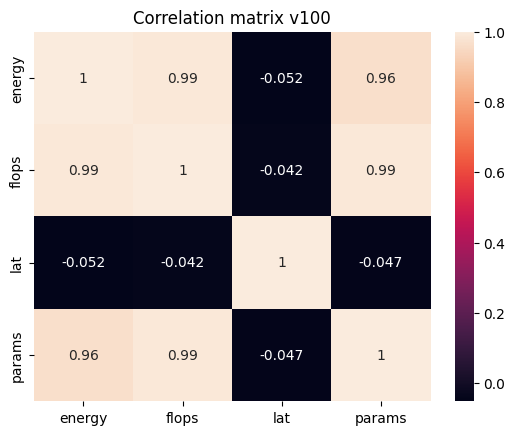

In [19]:
corr_mat
# plot correlation matrix
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(corr_mat, annot=True, xticklabels=["energy", "flops", "lat", "params"], yticklabels=["energy", "flops", "lat", "params"])
plt.title("Correlation matrix v100")
plt.savefig("correlation_matrix_v100.pdf")
plt.show()


Text(0, 0.5, 'flops')

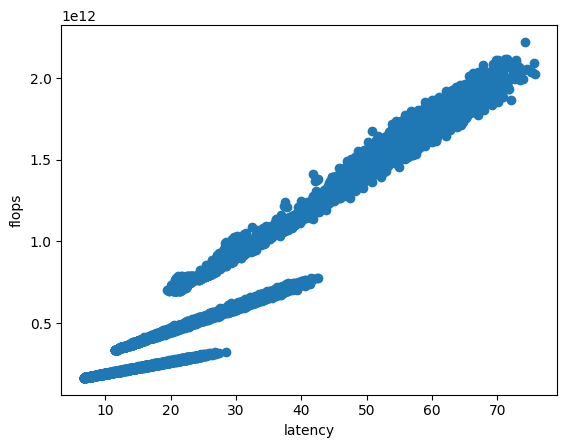

In [48]:
import matplotlib.pyplot as plt
plt.scatter(lat,flops)
plt.xlabel("latency")
plt.ylabel("flops")

In [10]:
!pip install seaborn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 10.6 MB/s eta 0:00:00


In [31]:
# read all gpu data
import pickle
i = 0
increment = 2500
v100 = []
for i in range(0, 10000, increment):
 path = "/work/dlclarge2/sukthank-hw-llm-bench/HW-Aware-LLM-Bench/latency_v100_m/efficiency_observations_" + str(i) + "_" + str(i+increment) + ".pkl"
 with open(path,"rb") as f:
    a = pickle.load(f)
    v100.extend(a)
a100 = []
for i in range(0, 10000, increment):
 path = "/work/dlclarge2/sukthank-hw-llm-bench/HW-Aware-LLM-Bench/latency_a100_m/efficiency_observations_" + str(i) + "_" + str(i+increment) + ".pkl"
 with open(path,"rb") as f:
    a = pickle.load(f)
    a100.extend(a)
rtx2080 = []
for i in range(0, 10000, increment):
 path = "/work/dlclarge2/sukthank-hw-llm-bench/HW-Aware-LLM-Bench/latency_rtx2080_m/efficiency_observations_" + str(i) + "_" + str(i+increment) + ".pkl"
 with open(path,"rb") as f:
    a = pickle.load(f)
    rtx2080.extend(a)
rtx3090 = []
for i in range(0, 10000, increment):
 path = "/work/dlclarge2/sukthank-hw-llm-bench/HW-Aware-LLM-Bench/latency_rtx3080_m/efficiency_observations_" + str(i) + "_" + str(i+increment) + ".pkl"
 with open(path,"rb") as f:
    a = pickle.load(f)
    rtx3090.extend(a)
p100 = []
for i in range(0, 10000, increment):
 path = "/work/dlclarge2/sukthank-hw-llm-bench/HW-Aware-LLM-Bench/latency_P100_m/efficiency_observations_" + str(i) + "_" + str(i+increment) + ".pkl"
 with open(path,"rb") as f:
    a = pickle.load(f)
    p100.extend(a)
a6000 = []
for i in range(0, 10000, increment):
 path = "/work/dlclarge2/sukthank-hw-llm-bench/HW-Aware-LLM-Bench/latency_a6000_m/efficiency_observations_" + str(i) + "_" + str(i+increment) + ".pkl"
 with open(path,"rb") as f:
    a = pickle.load(f)
    a6000.extend(a)
# filter a600
a6000_subset = []
for a in a100:
      for b in a6000:
         if a["arch"] == b["arch"]:
               a6000_subset.append(b)
               break
a6000 = a6000_subset



In [32]:
print(len(v100))
print(len(a100))
print(len(rtx2080))
print(len(rtx3090))
print(len(p100))
print(len(a6000))

9991
9991
9991
9991
9991
9991


In [33]:
import numpy as np
latencies_all = {}
latencies_all["rtx2080"] = []
latencies_all["rtx3090"] = []
latencies_all["v100"] = []
latencies_all["a100"] = []
latencies_all["p100"] = []
latencies_all["a6000"] = []
energy_all = {}
energy_all["rtx2080"] = []
energy_all["rtx3090"] = []
energy_all["v100"] = []
energy_all["a100"] = []
energy_all["p100"] = []
energy_all["a6000"] = []

for i,a in enumerate(rtx2080):
    latencies_all["rtx2080"].append(np.mean(rtx2080[i]["times_profiler_gpu"]))
    latencies_all["rtx3090"].append(np.mean(rtx3090[i]["times_profiler_gpu"]))
    latencies_all["v100"].append(np.mean(v100[i]["times_profiler_gpu"]))
    latencies_all["a100"].append(np.mean(a100[i]["times_profiler_gpu"]))
    latencies_all["p100"].append(np.mean(p100[i]["times_profiler_gpu"]))
    latencies_all["a6000"].append(np.mean(a6000[i]["times_profiler_gpu"]))
    energy_all["rtx2080"].append(rtx2080[i]["mean_energy_gpu"])
    energy_all["rtx3090"].append(rtx3090[i]["mean_energy_gpu"])
    energy_all["v100"].append(v100[i]["mean_energy_gpu"])
    energy_all["a100"].append(a100[i]["mean_energy_gpu"])
    energy_all["p100"].append(p100[i]["mean_energy_gpu"])
    energy_all["a6000"].append(a6000[i]["mean_energy_gpu"])



In [34]:
# compute heat 
import scipy
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
matrix = np.zeros([6,6])
for i,li in enumerate([latencies_all["rtx2080"], latencies_all["rtx3090"], latencies_all["v100"], latencies_all["a100"], latencies_all["p100"], latencies_all["a6000"]]):
    for j, lj in enumerate([latencies_all["rtx2080"], latencies_all["rtx3090"], latencies_all["v100"], latencies_all["a100"], latencies_all["p100"], latencies_all["a6000"]]):
        matrix[i,j] = scipy.stats.kendalltau(li, lj)[0]
matrix_energy = np.zeros([5,5])
for i,li in enumerate([energy_all["rtx2080"], energy_all["rtx3090"], energy_all["a100"], energy_all["v100"], energy_all["a6000"]]):
    for j, lj in enumerate([energy_all["rtx2080"], energy_all["rtx3090"], energy_all["a100"], energy_all["v100"], energy_all["a6000"]]):
        matrix_energy[i,j] = scipy.stats.kendalltau(li, lj)[0]

In [35]:
print(len(latencies_all["rtx2080"]))
print(len(latencies_all["rtx3090"]))
print(len(latencies_all["v100"]))
print(len(latencies_all["a100"]))
print(len(latencies_all["p100"]))
print(len(latencies_all["a6000"]))

9991
9991
9991
9991
9991
9991


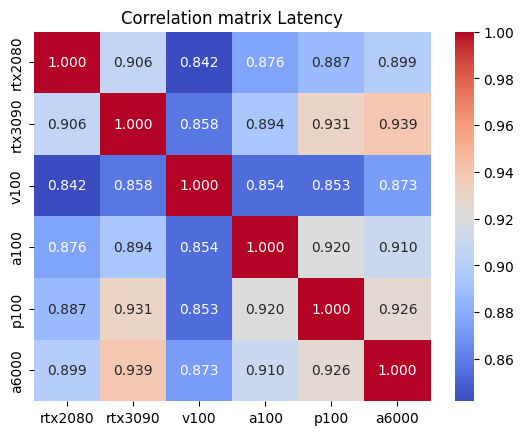

In [36]:
# plot the correlation matrix
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(matrix, annot=True, xticklabels=["rtx2080", "rtx3090", "v100", "a100", "p100", "a6000"], yticklabels=["rtx2080", "rtx3090", "v100", "a100", "p100", "a6000"], cmap='coolwarm', fmt='.3f')
plt.title("Correlation matrix Latency")
plt.savefig("correlation_matrix_latency_all_gpus_m.pdf")

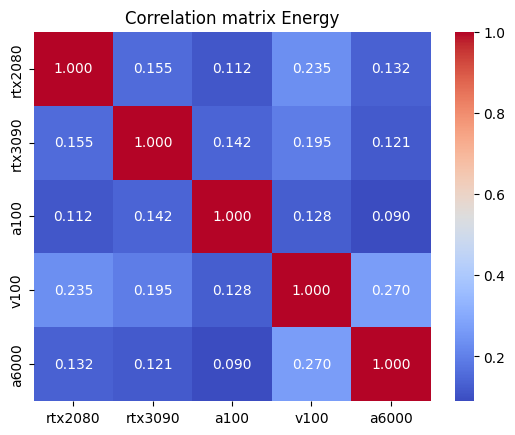

In [37]:
# plot the correlation matrix
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(matrix_energy, annot=True, xticklabels=["rtx2080", "rtx3090", "a100", "v100", "a6000"], yticklabels=["rtx2080", "rtx3090", "a100", "v100", "a6000"], cmap='coolwarm', fmt='.3f')
plt.title("Correlation matrix Energy")
plt.savefig("correlation_matrix_energy_all_gpus_m.pdf")

In [197]:
matrix_energy.shape

(5, 5)

In [46]:
latency_all_cpus = {}
energy_all_cpus = {}
start = 0
end = 10000
increment = 2500
latency_all_cpus["a6000"] = []
energy_all_cpus["a6000"] = []
latency_all_cpus["alldlc"] = []
energy_all_cpus["alldlc"] = []
latency_all_cpus["meta"] = []
energy_all_cpus["meta"] = []
latency_all_cpus["mlgpu"] = []
energy_all_cpus["mlgpu"] = []
latency_all_cpus["p100"] = []
energy_all_cpus["p100"] = []
archs_alldlc = []

for i in range(start, end, increment):
 with open("/work/dlclarge2/sukthank-hw-llm-bench/HW-Aware-LLM-Bench/latency_cpu_alldlc_m/efficiency_observations_" + str(i) + "_" + str(i+increment) + ".pkl","rb") as f:
    a = pickle.load(f)
    for i in range(len(a)):
        profiler_times_scaled = []
        for j, unit in enumerate(a[i]["unit_cpu"]):
            if unit == "ms":
                profiler_times_scaled.append(a[i]["times_profiler_cpu"][j])
            else:
                profiler_times_scaled.append(a[i]["times_profiler_cpu"][j]*1000)
        latency_all_cpus["alldlc"].append(np.mean(profiler_times_scaled))
        energy_all_cpus["alldlc"].append(a[i]["mean_energy_cpu"])
        archs_alldlc.append(a[i]["arch"])
for i in range(start, end, increment):
  with open("/work/dlclarge2/sukthank-hw-llm-bench/HW-Aware-LLM-Bench/latency_cpu_meta_m/efficiency_observations_" + str(i) + "_" + str(i+increment) + ".pkl","rb") as f:
    a = pickle.load(f)
    for i in range(len(a)):
        profiler_times_scaled = []
        for j, unit in enumerate(a[i]["unit_cpu"]):
            if unit == "ms":
                profiler_times_scaled.append(a[i]["times_profiler_cpu"][j])
            else:
                profiler_times_scaled.append(a[i]["times_profiler_cpu"][j]*1000)
        if a[i]["arch"] in archs_alldlc:
            latency_all_cpus["meta"].append(np.mean(profiler_times_scaled))
            energy_all_cpus["meta"].append(a[i]["mean_energy_cpu"])
for i in range(start, end, increment):
 archs_now = archs_alldlc[start:start+increment]
 with open("/work/dlclarge2/sukthank-hw-llm-bench/HW-Aware-LLM-Bench/latency_cpu_mlgpu_m/efficiency_observations_" + str(i) + "_" + str(i+increment) + ".pkl","rb") as f:
    a = pickle.load(f)
    for i in range(len(a)):
        profiler_times_scaled = []
        for j, unit in enumerate(a[i]["unit_cpu"]):
            if unit == "ms":
                profiler_times_scaled.append(a[i]["times_profiler_cpu"][j])
            else:
                profiler_times_scaled.append(a[i]["times_profiler_cpu"][j]*1000)
        if a[i]["arch"] in archs_alldlc:
            latency_all_cpus["mlgpu"].append(np.mean(profiler_times_scaled))
            energy_all_cpus["mlgpu"].append(a[i]["mean_energy_cpu"])
    print(len(a))
    #for i in range(len(a), len(archs_now)):
    #    latency_all_cpus["mlgpu"].append(0)
    #    energy_all_cpus["mlgpu"].append(0)
for i in range(start, end, increment):
 with open("/work/dlclarge2/sukthank-hw-llm-bench/HW-Aware-LLM-Bench/latency_cpu_a6000_m/efficiency_observations_" + str(i) + "_" + str(i+increment) + ".pkl","rb") as f:
    a = pickle.load(f)
    archs_now = archs_alldlc[start:start+increment]
    for i in range(len(a)):
        profiler_times_scaled = []
        for j, unit in enumerate(a[i]["unit_cpu"]):
            if unit == "ms":
                profiler_times_scaled.append(a[i]["times_profiler_cpu"][j])
            else:
                profiler_times_scaled.append(a[i]["times_profiler_cpu"][j]*1000)
        if a[i]["arch"] in archs_alldlc:
            latency_all_cpus["a6000"].append(np.mean(profiler_times_scaled))
            energy_all_cpus["a6000"].append(a[i]["mean_energy_cpu"])
    print(len(a))
for i in range(start, end, increment):
  with open("/work/dlclarge2/sukthank-hw-llm-bench/HW-Aware-LLM-Bench/latency_cpu_p100_m/efficiency_observations_" + str(i) + "_" + str(i+increment) + ".pkl","rb") as f:
    a = pickle.load(f)
    for i in range(len(a)):
        profiler_times_scaled = []
        for j, unit in enumerate(a[i]["unit_cpu"]):
            if unit == "ms":
                profiler_times_scaled.append(a[i]["times_profiler_cpu"][j])
            else:
                profiler_times_scaled.append(a[i]["times_profiler_cpu"][j]*1000)
        if a[i]["arch"] in archs_alldlc:
            latency_all_cpus["p100"].append(np.mean(profiler_times_scaled))
            energy_all_cpus["p100"].append(a[i]["mean_energy_cpu"])

2500
2500
2500
2491
2500
2500
2500
2491


In [47]:
print(len(latency_all_cpus["alldlc"]))
print(len(latency_all_cpus["meta"]))
print(len(latency_all_cpus["mlgpu"]))
print(len(latency_all_cpus["a6000"]))
print(len(latency_all_cpus["p100"]))

8968
8968
8968
8968
8965


In [50]:
# compute correlation matrices
import numpy as np
import pandas as pd
matrix_latency = np.zeros([4,4])
for i,li in enumerate([latency_all_cpus["alldlc"], latency_all_cpus["meta"], latency_all_cpus["mlgpu"], latency_all_cpus["a6000"]]):
    for j, lj in enumerate([latency_all_cpus["alldlc"], latency_all_cpus["meta"], latency_all_cpus["mlgpu"], latency_all_cpus["a6000"]]):
        matrix_latency[i,j] = scipy.stats.kendalltau(li, lj)[0]
matrix_energy = np.zeros([4,4])
for i,li in enumerate([energy_all_cpus["alldlc"], energy_all_cpus["meta"], energy_all_cpus["mlgpu"], energy_all_cpus["a6000"]]):
    for j, lj in enumerate([energy_all_cpus["alldlc"], energy_all_cpus["meta"], energy_all_cpus["mlgpu"], energy_all_cpus["a6000"]]):
        matrix_energy[i,j] = scipy.stats.kendalltau(li, lj)[0]



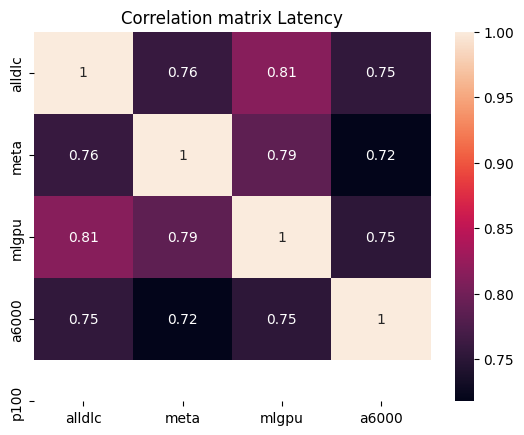

In [51]:
# plot correlation matrix
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(matrix_latency, annot=True, xticklabels=["alldlc", "meta", "mlgpu", "a6000"], yticklabels=["alldlc", "meta", "mlgpu", "a6000", "p100"])
plt.title("Correlation matrix Latency")
plt.savefig("correlation_matrix_latency_all_cpus_m.pdf")

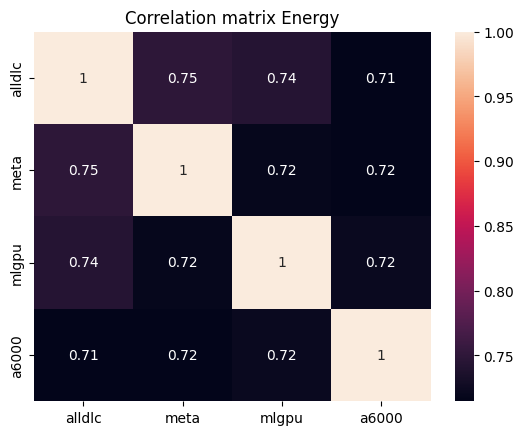

In [52]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(matrix_energy, annot=True, xticklabels=["alldlc", "meta", "mlgpu", "a6000"], yticklabels=["alldlc", "meta", "mlgpu", "a6000"])
plt.title("Correlation matrix Energy")
plt.savefig("correlation_matrix_energy_all_cpus_m.pdf")


In [55]:
# memory consumption

import pickle
with open("/work/dlclarge2/sukthank-hw-llm-bench/HW-Aware-LLM-Bench/mem_rtx2080_m/efficiency_observations_0_10000.pkl","rb") as f:
    a = pickle.load(f)
    mem_float16 = a

with open("/work/dlclarge2/sukthank-hw-llm-bench/HW-Aware-LLM-Bench/mem_a100_m/efficiency_observations_0_10000.pkl","rb") as f:
    a = pickle.load(f)
    mem_bfloat16 = a

In [59]:
print(len(mem_bfloat16))

9991


In [57]:
mems_bfloat16 = []
mems_float16 = []
for i in range(len(mem_bfloat16)):
    mems_bfloat16.append(mem_bfloat16[i]["mean_mem"])
    mems_float16.append(mem_float16[i]["mean_mem"])

In [60]:
# compute correlation matrices for everything
import numpy as np
import pandas as pd
matrix_latency_mem_energy = np.zeros([12,12])
for i,li in enumerate([latencies_all["rtx2080"], latencies_all["rtx3090"], latencies_all["v100"], latencies_all["a100"], latencies_all["a6000"], energy_all["rtx2080"], energy_all["rtx3090"], energy_all["v100"], energy_all["a100"], energy_all["a6000"], mems_float16, mems_bfloat16]):
    for j, lj in enumerate([latencies_all["rtx2080"], latencies_all["rtx3090"], latencies_all["v100"], latencies_all["a100"], latencies_all["a6000"], energy_all["rtx2080"], energy_all["rtx3090"], energy_all["v100"], energy_all["a100"], energy_all["a6000"], mems_float16, mems_bfloat16]):
        matrix_latency_mem_energy[i,j] = scipy.stats.kendalltau(li, lj)[0]


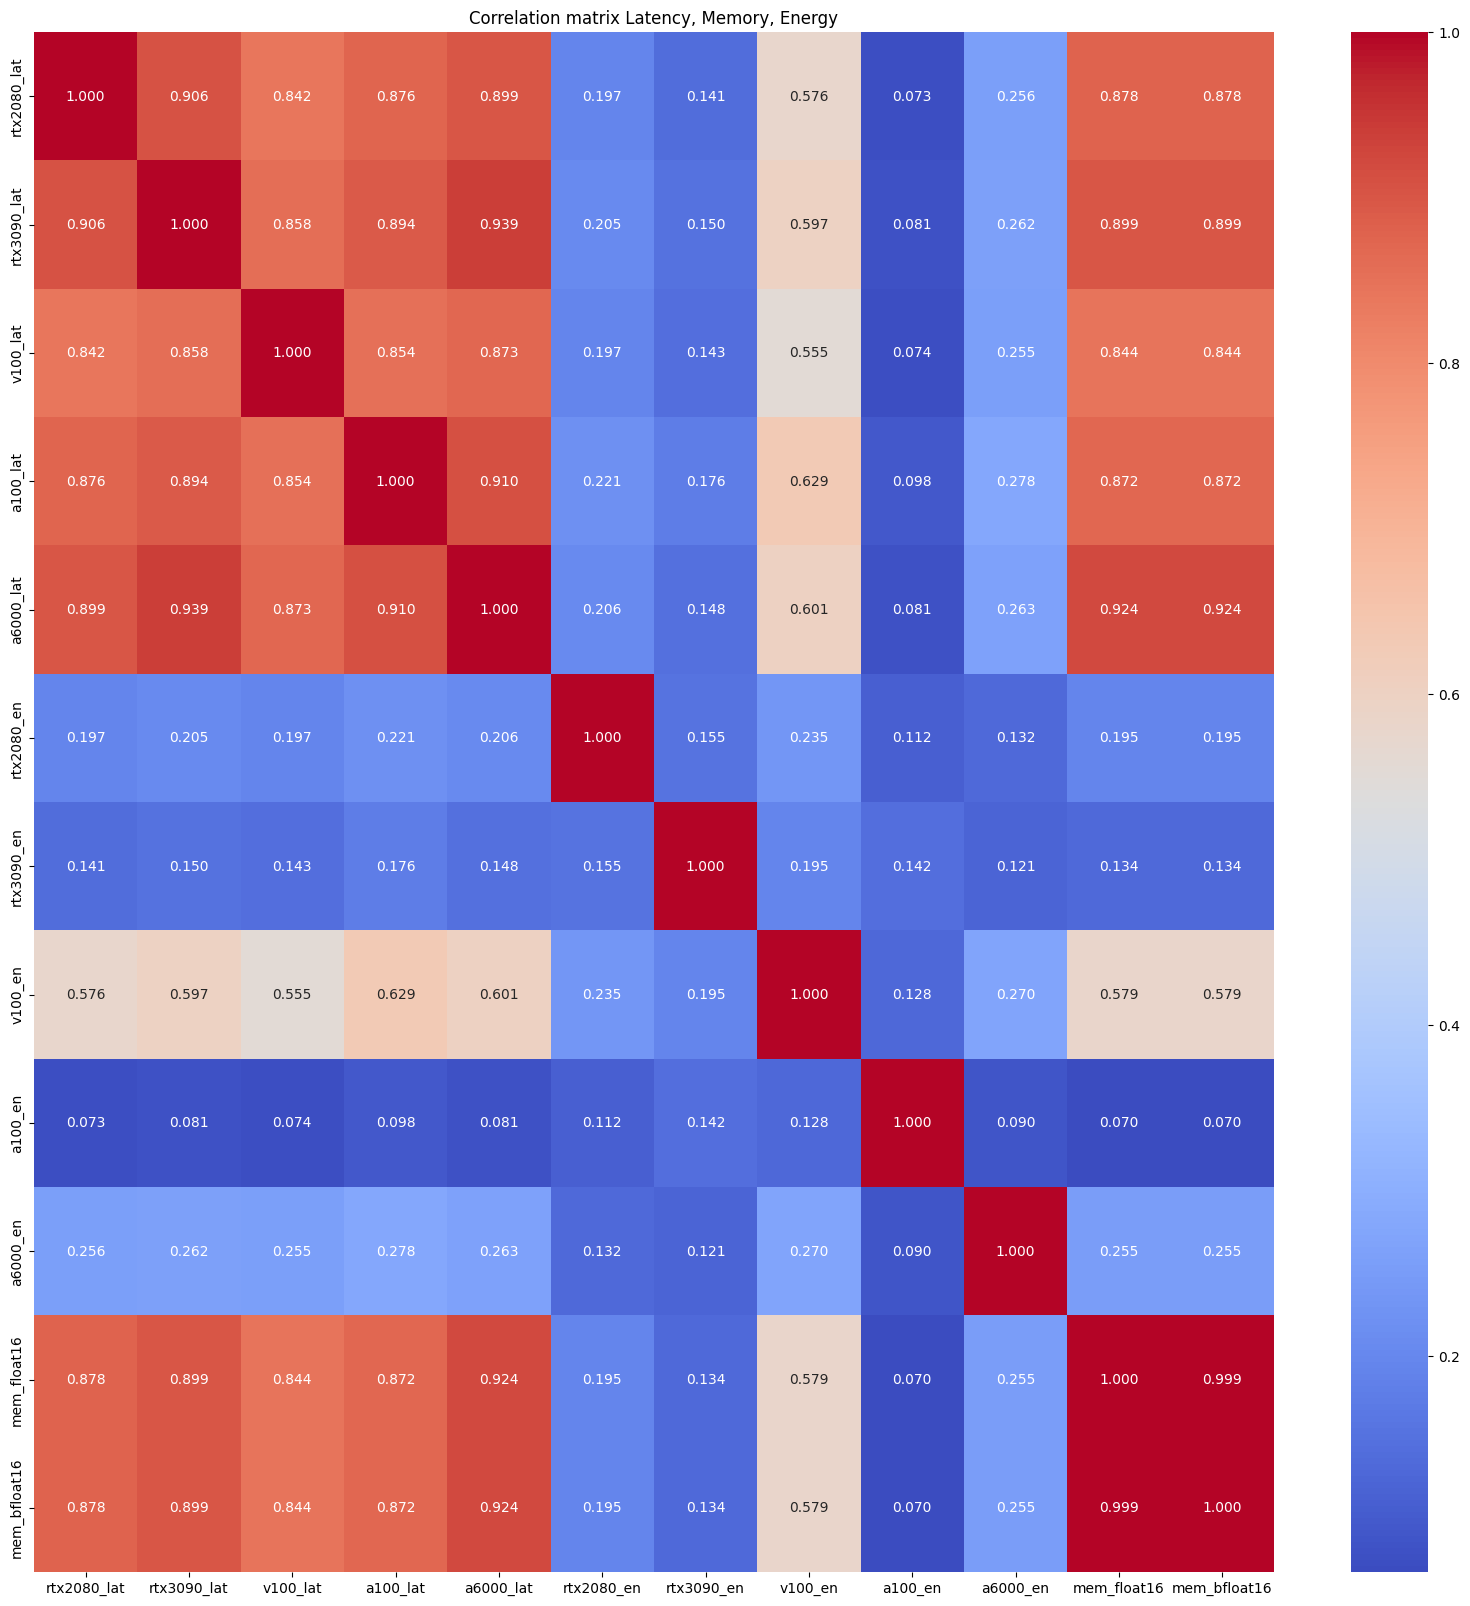

In [62]:
# plot correlation matrix
import seaborn as sns
import matplotlib.pyplot as plt
# increase size of plot
plt.figure(figsize=(20, 20))
sns.heatmap(matrix_latency_mem_energy, annot=True, xticklabels=["rtx2080_lat", "rtx3090_lat", "v100_lat", "a100_lat", "a6000_lat", "rtx2080_en", "rtx3090_en", "v100_en", "a100_en", "a6000_en", "mem_float16", "mem_bfloat16"], yticklabels=["rtx2080_lat", "rtx3090_lat", "v100_lat", "a100_lat", "a6000_lat", "rtx2080_en", "rtx3090_en", "v100_en", "a100_en", "a6000_en", "mem_float16", "mem_bfloat16"], cmap='coolwarm', fmt='.3f')
plt.title("Correlation matrix Latency, Memory, Energy")
plt.savefig("correlation_matrix_latency_mem_energy_all_m.pdf")

In [1]:
# energy analysis
import pickle
increment = 2500
rtx2080 = []
rtx2080_params = []
for i in range(0, 10000, increment):
 path = "/work/dlclarge2/sukthank-hw-llm-bench/HW-Aware-LLM-Bench/latency_a6000/efficiency_energy_observations_" + str(i) + "_" + str(i+increment) + ".pkl"
 with open(path,"rb") as f:
    a = pickle.load(f)
    rtx2080.extend(a)
 path2 = "/work/dlclarge2/sukthank-hw-llm-bench/HW-Aware-LLM-Bench/latency_a6000/efficiency_observations_" + str(i) + "_" + str(i+increment) + ".pkl"
 with open(path2,"rb") as f:
    b = pickle.load(f)
    rtx2080_params.extend(b[:len(a)])

In [6]:
with open("/work/dlclarge2/sukthank-hw-llm-bench/HW-Aware-LLM-Bench/latency_rtx2080_test_2/efficiency_energy_observations_0_10000.pkl","rb") as f:
    a = pickle.load(f)
    rtx2080_test = a

In [7]:
len(rtx2080_test)

809

In [8]:
rtx2080_test[0]

{'arch': {'sample_embed_dim': 768,
  'sample_n_layer': 10,
  'sample_layer_indices': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
  'sample_n_head': [4, 12, 12, 4, 4, 12, 12, 8, 4, 12, 8, 4],
  'sample_mlp_ratio': [2, 2, 4, 4, 3, 3, 3, 4, 4, 2, 3, 2],
  'sample_bias': False},
 'mean_co2_cpu': None,
 'std_co2_cpu': None,
 'std_co2_gpu': 0,
 'mean_co2_gpu': 1.847936466e-05,
 'unit': 'kgCO2',
 'mean_energy_cpu': None,
 'std_energy_cpu': None,
 'mean_energy_gpu': 5.243525e-08,
 'std_energy_gpu': 0,
 'unit_energy': 'Wh',
 'emissions_gpu': [],
 'energy_gpu': [],
 'emissions_cpu': [],
 'energy_cpu': []}

In [9]:
energy = []
for i in rtx2080_test:
    energy.append(i["mean_energy_gpu"])

In [10]:
param_sub = params[0:len(energy)]

In [11]:
# kendall tau
import scipy
scipy.stats.kendalltau(energy, param_sub)

SignificanceResult(statistic=-0.015952340075594762, pvalue=0.5144915257774678)

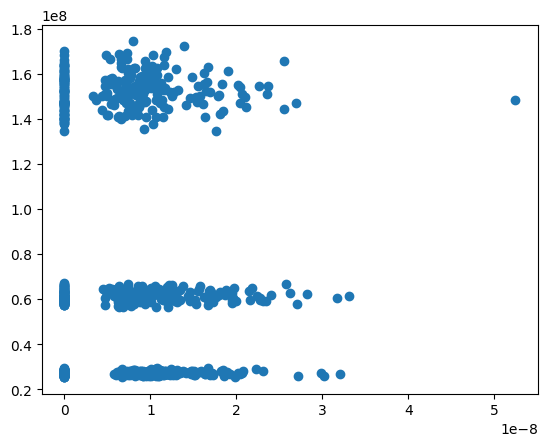

In [12]:
plt.scatter(energy, param_sub)

In [18]:
print(len(rtx2080))
print(len(rtx2080_params))

2506
2506


In [113]:
list(rtx2080_params[0].keys())

['arch',
 'cpu_lat',
 'cpu_lat_std',
 'gpu_lat',
 'gpu_lat_std',
 'unit_cpu',
 'unit_gpu',
 'times_profiler_gpu',
 'times_profiler_cpu',
 'flops',
 'macs',
 'params',
 'mean_co2_cpu',
 'std_co2_cpu',
 'std_co2_gpu',
 'mean_co2_gpu',
 'unit',
 'mean_energy_cpu',
 'std_energy_cpu',
 'mean_energy_gpu',
 'std_energy_gpu',
 'unit_energy']

In [114]:
rtx2080[128]["times_profiler_gpu"]

KeyError: 'times_profiler_gpu'

In [2]:
import numpy as np
means  = []
median = []
std = []
quantile_25 = []
quantile_75 = []
quantile_90 = []
quantile_99 = []
outliers_99 = []
outliers_90 = []
outliers_75 = []
params = []
flops = []
df = {}
latency = []
count = 0
for i in rtx2080:
    means.append(np.mean(i["energy_gpu"]))
    median.append(np.median(i["energy_gpu"][2:12]))
    std.append(np.std(i["energy_gpu"]))
    quantile_25.append(np.percentile(i["energy_gpu"][2:12], 25))
    quantile_75.append(np.percentile(i["energy_gpu"][2:12], 75))
    quantile_90.append(np.percentile(i["energy_gpu"][2:12], 90))
    quantile_99.append(np.percentile(i["energy_gpu"][2:12], 99))
    outliers_90.append(len([x for x in i["energy_gpu"][2:12] if x > np.percentile(i["energy_gpu"][2:12], 90)]))
    outliers_99.append(len([x for x in i["energy_gpu"][2:12] if x > np.percentile(i["energy_gpu"][2:12], 99)]))
    outliers_75.append(len([x for x in i["energy_gpu"][2:12] if x > np.percentile(i["energy_gpu"][2:12], 75)]))
    params.append(rtx2080_params[count]["params"])
    flops.append(rtx2080_params[count]["flops"])
    latency.append(rtx2080_params[count]["gpu_lat"])
    count = count+1
    #print(means[-1], median[-1], std[-1], quantile_25[-1], quantile_75[-1], quantile_90[-1], quantile_99[-1])
df["mean"] = means
df["median"] = median
df["std"] = std
df["quantile_25"] = quantile_25
df["quantile_75"] = quantile_75
df["quantile_90"] = quantile_90
df["quantile_99"] = quantile_99
df["outliers_90"] = outliers_90
df["outliers_99"] = outliers_99
df["outliers_75"] = outliers_75
df["params"] = params
df["flops"] = flops
df["latency"] = latency




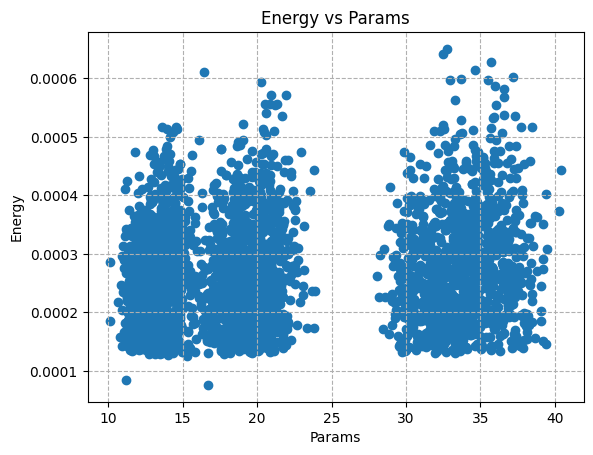

In [3]:
# compute corr between energy and params
import scipy.stats
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.grid(linestyle='--')
plt.scatter(latency,median)
plt.xlabel("Params")
plt.ylabel("Energy")
plt.title("Energy vs Params")
plt.savefig("energy_params_a6000.pdf")

In [7]:
# compute kendall correlation between energy and params
import scipy.stats
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
scipy.stats.kendalltau(means, flops)
#scipy.stats.spearmanr(means, latency)


SignificanceResult(statistic=0.1660147056508331, pvalue=3.4944926360143037e-44)

In [22]:
import pandas as pd
df = pd.DataFrame(df)

<Axes: xlabel='median', ylabel='Count'>

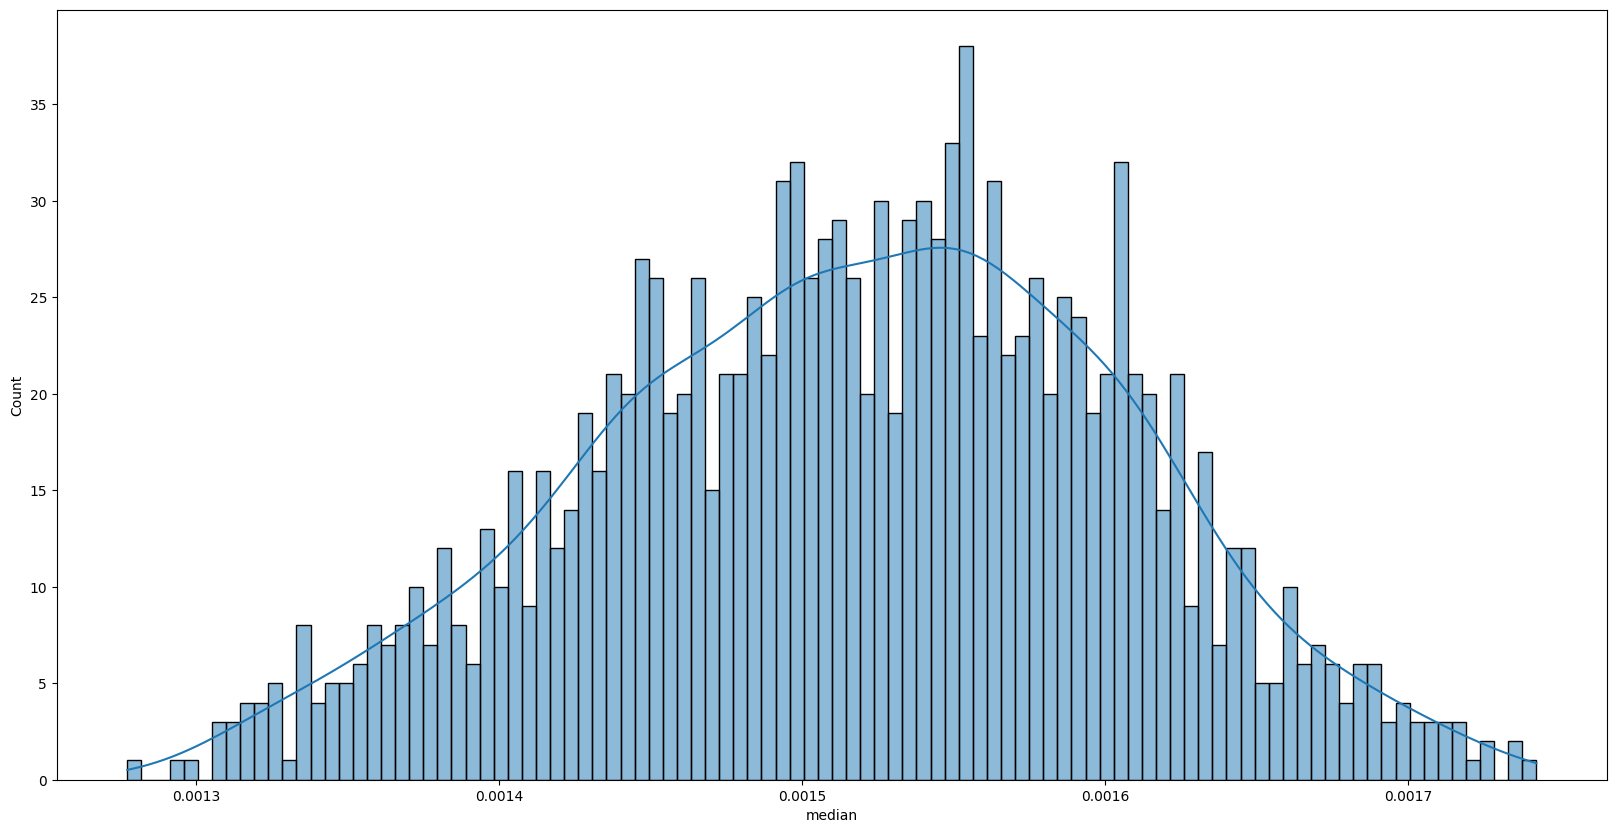

In [26]:
#plot histogram of all metrics
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 10))
sns.histplot(df["median"], bins=100, kde=True)

In [228]:
def compute_outliers(data, quantile_99):
    outliers = []
    for i in data:
        if i > quantile_99:
            outliers.append(i)
    return outliers

In [229]:
df = pd.DataFrame(df)
df.head()

,mean,median,std,quantile_25,quantile_75,quantile_90,quantile_99,outliers_90,outliers_99,outliers_75,params,flops,latency
0,0.001035,0.000266,0.001836,0.000140,0.000420,0.000881,0.003716,1,1,3,148591104,1802502144000,31.4445
1,0.000194,0.000167,0.000132,0.000129,0.000321,0.000389,0.000445,1,1,3,28142208,303097184256,13.5943
2,0.000456,0.000227,0.000497,0.000161,0.000422,0.000696,0.001869,1,1,3,158424576,1963664080896,33.9103
3,0.000267,0.000285,0.000109,0.000151,0.000354,0.000389,0.000411,1,1,3,26641536,278488154112,12.0724
4,0.000240,0.000189,0.000165,0.000138,0.000383,0.000508,0.000571,1,1,3,64915968,746685726720,20.2121


In [41]:
df[df["outliers_90"]==0]

,mean,median,std,quantile_25,quantile_75,quantile_90,quantile_99,outliers_90,outliers_99,outliers_75
164,39.2564,39.2555,0.023286,39.23350,39.27950,39.288,39.288,0,0,3
169,26.8267,26.8245,0.018352,26.81550,26.84400,26.850,26.850,0,0,3
426,47.0182,47.0195,0.023937,47.00000,47.04150,47.048,47.048,0,0,3
446,29.5683,29.5805,0.026511,29.56225,29.58450,29.592,29.592,0,0,3
479,28.5992,28.6030,0.015178,28.59750,28.60850,28.611,28.611,0,0,3
...,...,...,...,...,...,...,...,...,...,...
2841,42.5999,42.6080,0.019170,42.59525,42.61350,42.618,42.618,0,0,3
2852,25.8498,25.8515,0.029322,25.82625,25.87350,25.889,25.889,0,0,3
2912,30.4506,30.4470,0.018613,30.43250,30.47200,30.473,30.473,0,0,3
2932,49.0829,49.0775,0.021658,49.07050,49.10475,49.112,49.112,0,0,3


In [42]:
df[df["outliers_25"]==1]

,mean,median,std,quantile_25,quantile_75,quantile_90,quantile_99,outliers_90,outliers_99,outliers_75
0,71.3391,71.3190,0.078720,71.27025,71.38000,71.4696,71.47446,1,1,3
1,32.4319,32.4325,0.014131,32.41925,32.44375,32.4494,32.45264,1,1,3
2,73.9716,76.1915,4.500247,68.69775,78.17775,78.2137,78.22747,1,1,3
3,28.4671,28.4730,0.017891,28.46150,28.47875,28.4804,28.48364,1,1,3
4,47.6535,47.6620,0.023088,47.63400,47.66950,47.6740,47.69020,1,1,3
...,...,...,...,...,...,...,...,...,...,...
3000,68.1559,71.6050,5.517875,61.64400,71.73325,72.2783,76.18493,1,1,3
3001,70.9752,71.9430,6.200831,64.30975,75.19025,79.5673,80.95483,1,1,3
3002,43.3949,43.3900,0.028908,43.38125,43.39575,43.4427,43.44837,1,1,3
3003,30.6759,30.6780,0.030471,30.65600,30.70350,30.7102,30.71182,1,1,3


<Axes: >

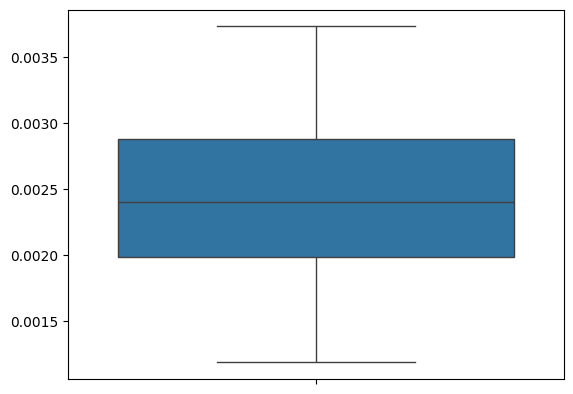

In [28]:
# box plot
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(data=rtx2080[12]["energy_gpu"])

In [29]:
rtx2080[12]["energy_gpu"]

[0.001190490473065419,
 0.0037281083180456184,
 0.0017202657482569823,
 0.0036039167692419483,
 0.0024492021151615974,
 0.0023794988861141064,
 0.0030176055979300523,
 0.001872163323637513,
 0.002325737739964495,
 0.0024193708264574334]

In [ ]:
with open()

In [43]:
with open("latency_analysis_gpu.pkl","wb") as f:
    pickle.dump(df, f)

In [33]:
df = pd.DataFrame(df)

In [35]:
df.head()

,mean,median,std,quantile_25,quantile_75,quantile_90,quantile_99,outliers_90,outliers_99,outliers_75
0,0.002103,0.001816,0.000690,0.001596,0.002139,0.003196,0.003600,1,1,3
1,0.002397,0.002381,0.000714,0.001885,0.002802,0.003255,0.003762,1,1,3
2,0.002526,0.002327,0.000693,0.002231,0.002618,0.003693,0.003889,1,1,3
3,0.002138,0.001842,0.000702,0.001627,0.002220,0.003285,0.003611,1,1,3
4,0.002246,0.002037,0.000756,0.001733,0.002404,0.003529,0.003660,1,1,3


In [1]:
# energy analysis
import pickle
increment = 2500
rtx2080 = []
for i in range(0, 10000, increment):
 path = "/work/dlclarge2/sukthank-hw-llm-bench/HW-Aware-LLM-Bench/latency_a100/efficiency_observations_" + str(i) + "_" + str(i+increment) + ".pkl"
 with open(path,"rb") as f:
    a = pickle.load(f)
    rtx2080.extend(a)
times_profiler_cpu_scaled = []
for i in rtx2080:
   if i["unit_gpu"] == "s":
       times_profiler_cpu_scaled.append([x*1000 for x in i["times_profiler_gpu"]])
   else:
      times_profiler_cpu_scaled.append(i["times_profiler_gpu"])
for i in range(len(rtx2080)):
      rtx2080[i]["times_profiler_cpu"] = times_profiler_cpu_scaled[i]
import numpy as np
means  = []
median = []
std = []
quantile_25 = []
quantile_75 = []
quantile_90 = []
quantile_99 = []
outliers_99 = []
outliers_90 = []
outliers_75 = []
df = {}
for i in rtx2080:
    means.append(np.mean(i["times_profiler_gpu"]))
    median.append(np.median(i["times_profiler_gpu"]))
    std.append(np.std(i["times_profiler_gpu"]))
    quantile_25.append(np.percentile(i["times_profiler_gpu"], 25))
    quantile_75.append(np.percentile(i["times_profiler_gpu"], 75))
    quantile_90.append(np.percentile(i["times_profiler_gpu"], 90))
    quantile_99.append(np.percentile(i["times_profiler_cpu"], 99))
    outliers_90.append(len([x for x in i["times_profiler_cpu"] if x > np.percentile(i["times_profiler_cpu"], 90)]))
    outliers_99.append(len([x for x in i["times_profiler_cpu"] if x > np.percentile(i["times_profiler_cpu"], 99)]))
    outliers_75.append(len([x for x in i["times_profiler_cpu"] if x > np.percentile(i["times_profiler_cpu"], 75)]))
    #print(means[-1], median[-1], std[-1], quantile_25[-1], quantile_75[-1], quantile_90[-1], quantile_99[-1])
df["mean"] = means
df["median"] = median
df["std"] = std
df["quantile_25"] = quantile_25
df["quantile_75"] = quantile_75
df["quantile_90"] = quantile_90
df["quantile_99"] = quantile_99
df["outliers_90"] = outliers_90
df["outliers_99"] = outliers_99
df["outliers_75"] = outliers_75


FileNotFoundError: [Errno 2] No such file or directory: '/work/dlclarge2/sukthank-hw-llm-bench/HW-Aware-LLM-Bench/latency_a100/efficiency_energy_observations_0_2500.pkl'

In [54]:
with open("latency_analysis_cpu.pkl","wb") as f:
    pickle.dump(df, f)

In [53]:
df = pd.DataFrame(df)

In [6]:
import pickle
import numpy as np
i = 0
increment = 2500
cat_list = []
for i in range(0, 10000, increment):
 path = "/work/dlclarge2/sukthank-hw-llm-bench/HW-Aware-LLM-Bench/latency_h100_m/efficiency_observations_" + str(i) + "_" + str(i+increment) + ".pkl"
 with open(path,"rb") as f:
    a = pickle.load(f)
    cat_list.extend(a)
a = cat_list

In [7]:
params = []
flops = []
for i in range(len(a)):
    params.append(a[i]["params"])
    flops.append(a[i]["flops"])

In [5]:
max(params)

922805760

In [8]:
max(params)

446953472

In [2]:
import pickle
with open("energy_analysis_a100.pkl","rb") as f:
    a = pickle.load(f)

In [21]:
import pickle
with open("/work/dlclarge2/sukthank-hw-llm-bench/HW-Aware-LLM-Bench/latency_rtx2080/efficiency_energy_observations_tracker_0_2500.pkl","rb") as f:
    a = pickle.load(f)


In [25]:
energies = []
for i in a:
    energies.append(i["energy_gpu"])

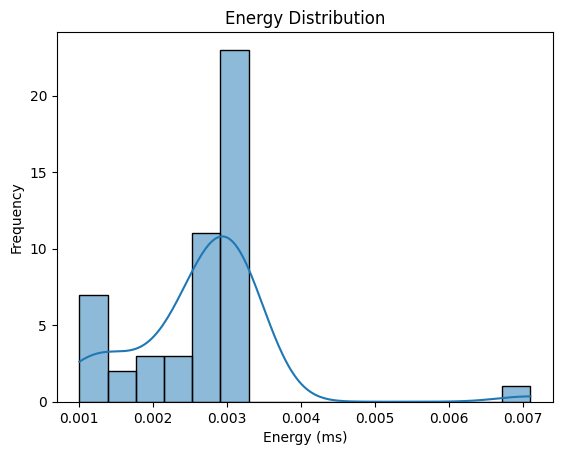

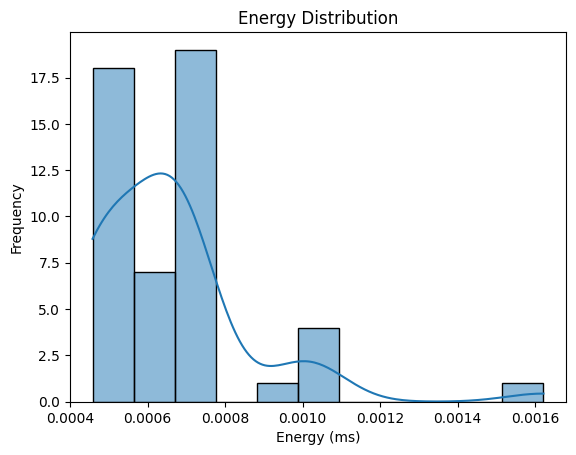

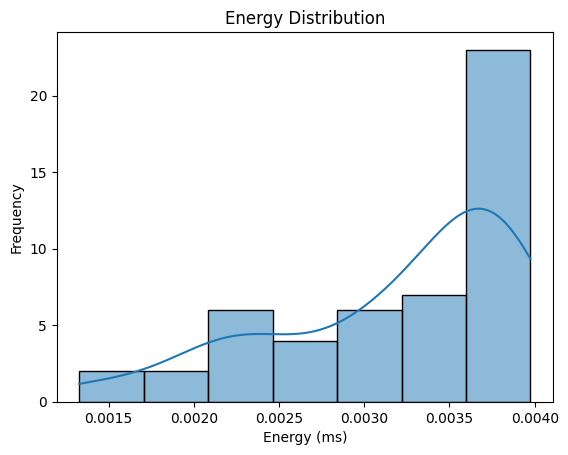

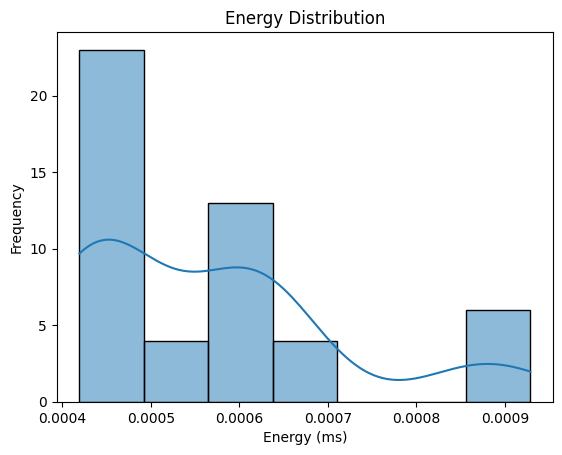

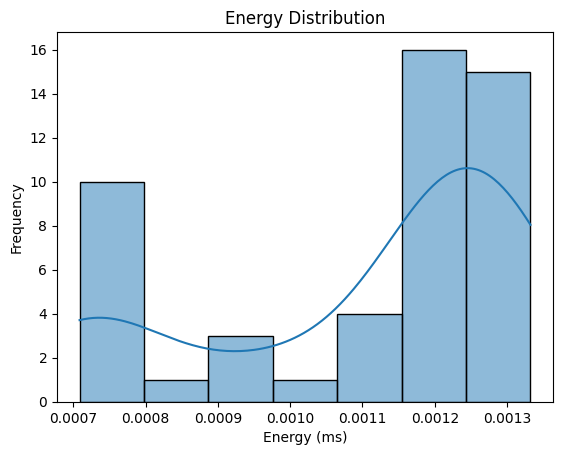

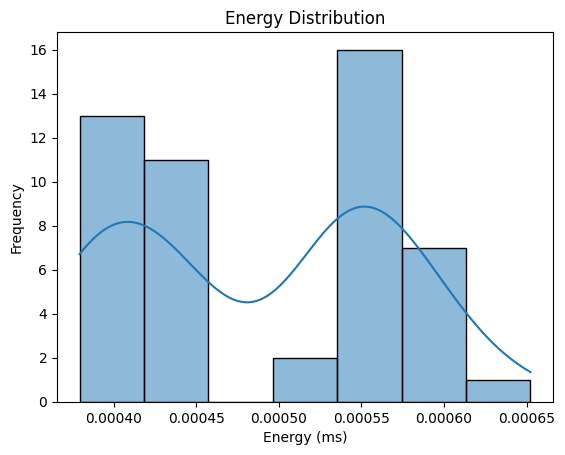

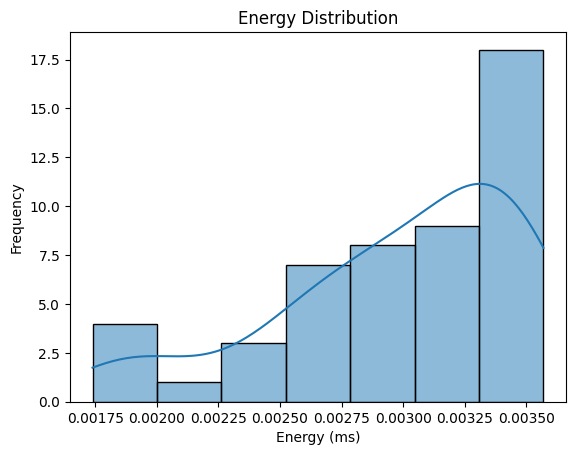

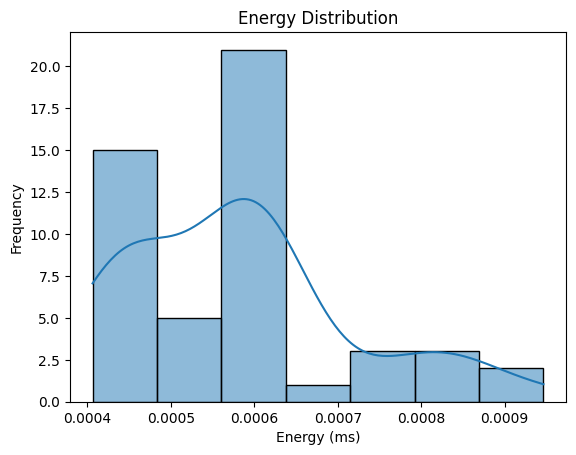

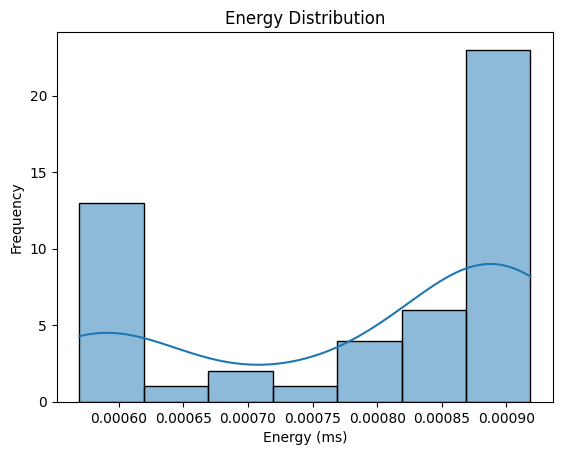

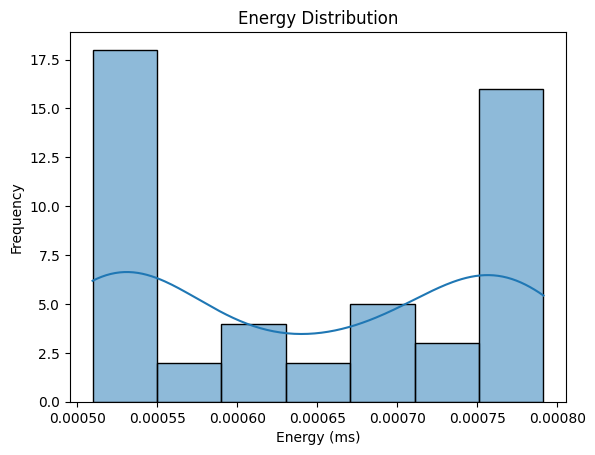

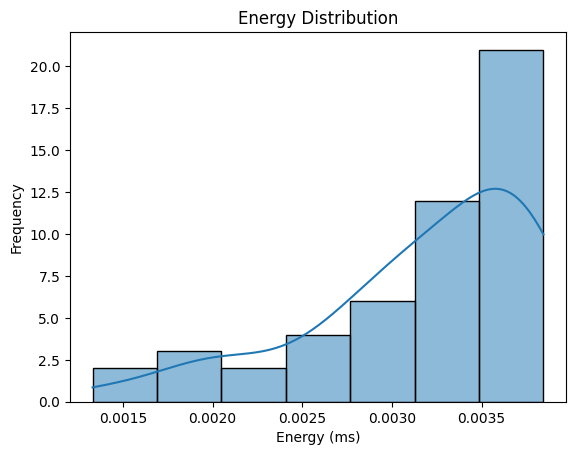

<Figure size 640x480 with 0 Axes>

In [26]:
# plot histogram of energy 
import seaborn as sns
import matplotlib.pyplot as plt
i = 100
for energy in energies:
    sns.histplot(energy, kde=True)
    plt.xlabel("Energy (ms)")
    plt.ylabel("Frequency")
    plt.title("Energy Distribution")
    plt.show()
    plt.clf()
    i = i+1
    if i > 110:
        break